In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np


In [2]:
pd.set_option("display.max_rows", 100)

pd.set_option("display.max_columns", 70)

In [3]:
df = pd.read_parquet("s3://projectdatagroup1/OmkarSample/SampleInput/PCA_final_sampled_flight_data_all_years.parquet")

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:283: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


In [4]:
df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,Day,Hour,Date
0,2018-01-01,Alaska Airlines Inc.,LAX,SEA,False,False,2335,00:57,82.0,82.0,323.0,50.0,127.0,178.0,146.0,954.0,2018,1,1,1,1,AS,AS,19930,AS,287,AS,19930,AS,N483AS,287,12892,1289208,32575,"Los Angeles, CA",CA,6,California,91,14747,1474703,30559,"Seattle, WA",WA,53,Washington,93,1.0,5.0,2300-2359,13.0,110.0,317.0,6.0,233,50.0,1.0,3.0,0001-0559,4,0.0,2018-01-01,0.0,2018-01-01
1,2018-01-01,Southwest Airlines Co.,DEN,SFO,False,False,2225,01:18,173.0,173.0,249.0,154.0,129.0,170.0,151.0,967.0,2018,1,1,1,1,WN,WN,19393,WN,1726,WN,19393,WN,N8645A,1726,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,14771,1477104,32457,"San Francisco, CA",CA,6,California,91,1.0,11.0,2200-2259,14.0,132.0,241.0,8.0,15,154.0,1.0,10.0,0001-0559,4,0.0,2018-01-01,1.0,2018-01-01
2,2018-01-01,United Air Lines Inc.,DEN,SFO,False,False,537,05:33,0.0,-4.0,714.0,0.0,139.0,165.0,161.0,967.0,2018,1,1,1,1,UA,UA,19977,UA,256,UA,19977,UA,N403UA,256,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,14771,1477104,32457,"San Francisco, CA",CA,6,California,91,0.0,-1.0,0001-0559,13.0,546.0,705.0,9.0,722,-8.0,0.0,-1.0,0700-0759,4,0.0,2018-01-01,5.0,2018-01-01
3,2018-01-01,Delta Air Lines Inc.,OAK,SLC,False,False,600,05:59,0.0,-1.0,838.0,0.0,77.0,110.0,99.0,588.0,2018,1,1,1,1,DL,DL,19790,DL,1379,DL,19790,DL,N910DN,1379,13796,1379608,32457,"Oakland, CA",CA,6,California,91,14869,1486903,34614,"Salt Lake City, UT",UT,49,Utah,87,0.0,-1.0,0600-0659,18.0,617.0,834.0,4.0,850,-12.0,0.0,-1.0,0800-0859,3,0.0,2018-01-01,5.0,2018-01-01
4,2018-01-01,United Air Lines Inc.,DFW,LAX,False,False,545,05:39,0.0,-6.0,720.0,0.0,180.0,229.0,221.0,1235.0,2018,1,1,1,1,UA,UA,19977,UA,1591,UA,19977,UA,N87527,1591,11298,1129806,30194,"Dallas/Fort Worth, TX",TX,48,Texas,74,12892,1289208,32575,"Los Angeles, CA",CA,6,California,91,0.0,-1.0,0001-0559,17.0,556.0,656.0,24.0,734,-14.0,0.0,-1.0,0700-0759,5,0.0,2018-01-01,5.0,2018-01-01


In [5]:
df.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [6]:
df.drop(columns=[ "Cancelled", "Diverted", "Day", "Hour", "Date", 
                     "Marketing_Airline_Network", "Operated_or_Branded_Code_Share_Partners", "DOT_ID_Marketing_Airline",
                     "IATA_Code_Operating_Airline", "Flight_Number_Marketing_Airline", "Operating_Airline", "DOT_ID_Operating_Airline", "IATA_Code_Operating_Airline",
                     "Tail_Number", "Flight_Number_Operating_Airline", "OriginAirportID", 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginState', 'OriginStateFips',
                     'OriginWac','DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestState', 'DestStateFips', 'DepDel15', 'DestWac', 'DepartureDelayGroups', 'DepTimeBlk',
                     'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk','DivAirportLandings', 'IATA_Code_Marketing_Airline', 'DistanceGroup' ], axis=1, inplace = True)

In [7]:
df.head()

,FlightDate,Airline,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,OriginCityName,OriginStateName,DestCityName,DestStateName,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,DistanceGroup
0,2018-01-01,Alaska Airlines Inc.,LAX,SEA,2335,00:57,82.0,82.0,323.0,50.0,127.0,178.0,146.0,954.0,2018,1,1,1,1,"Los Angeles, CA",California,"Seattle, WA",Washington,13.0,110.0,317.0,6.0,233,50.0,4
1,2018-01-01,Southwest Airlines Co.,DEN,SFO,2225,01:18,173.0,173.0,249.0,154.0,129.0,170.0,151.0,967.0,2018,1,1,1,1,"Denver, CO",Colorado,"San Francisco, CA",California,14.0,132.0,241.0,8.0,15,154.0,4
2,2018-01-01,United Air Lines Inc.,DEN,SFO,537,05:33,0.0,-4.0,714.0,0.0,139.0,165.0,161.0,967.0,2018,1,1,1,1,"Denver, CO",Colorado,"San Francisco, CA",California,13.0,546.0,705.0,9.0,722,-8.0,4
3,2018-01-01,Delta Air Lines Inc.,OAK,SLC,600,05:59,0.0,-1.0,838.0,0.0,77.0,110.0,99.0,588.0,2018,1,1,1,1,"Oakland, CA",California,"Salt Lake City, UT",Utah,18.0,617.0,834.0,4.0,850,-12.0,3
4,2018-01-01,United Air Lines Inc.,DFW,LAX,545,05:39,0.0,-6.0,720.0,0.0,180.0,229.0,221.0,1235.0,2018,1,1,1,1,"Dallas/Fort Worth, TX",Texas,"Los Angeles, CA",California,17.0,556.0,656.0,24.0,734,-14.0,5


In [8]:
df.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'CRSDepTime', 'DepTime',
       'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime',
       'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter',
       'Month', 'DayofMonth', 'DayOfWeek', 'OriginCityName', 'OriginStateName',
       'DestCityName', 'DestStateName', 'TaxiOut', 'WheelsOff', 'WheelsOn',
       'TaxiIn', 'CRSArrTime', 'ArrDelay', 'DistanceGroup'],
      dtype='object')

In [9]:
len(df.columns)

30

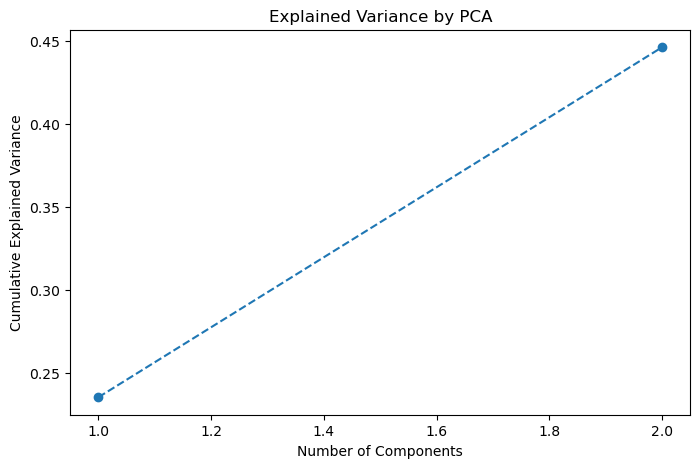

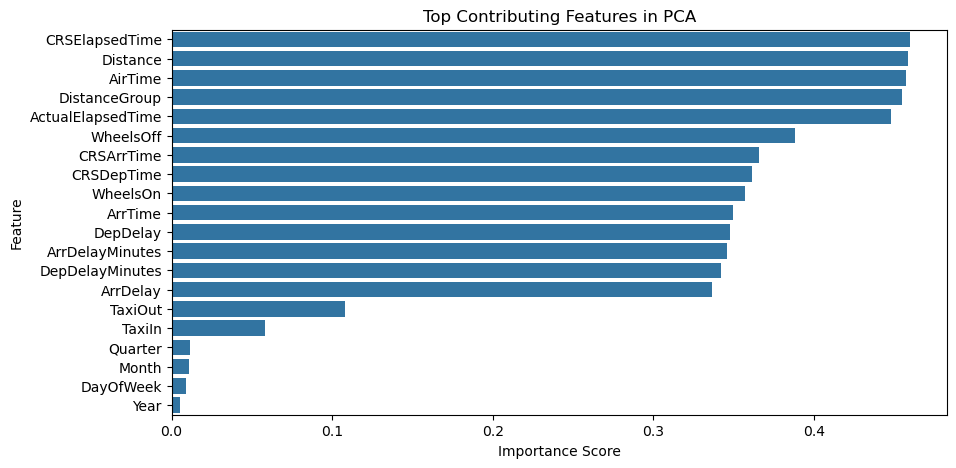

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Drop non-numeric columns (datetime and categorical)
df_numeric = df.select_dtypes(include=['number'])

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# Plot explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA')
plt.show()

# Identify highly contributing features
loadings = pca.components_[:2]  # Take top 2 components
feature_importance = np.abs(loadings).sum(axis=0)
feature_names = df_numeric.columns
important_features = pd.Series(feature_importance, index=feature_names).nlargest(20)  # Top 5 features

# Plot highly contributing features
plt.figure(figsize=(10,5))
sns.barplot(x=important_features.values, y=important_features.index)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top Contributing Features in PCA")
plt.show()


In [11]:
df.head()

,FlightDate,Airline,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,OriginCityName,OriginStateName,DestCityName,DestStateName,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,DistanceGroup
0,2018-01-01,Alaska Airlines Inc.,LAX,SEA,2335,00:57,82.0,82.0,323.0,50.0,127.0,178.0,146.0,954.0,2018,1,1,1,1,"Los Angeles, CA",California,"Seattle, WA",Washington,13.0,110.0,317.0,6.0,233,50.0,4
1,2018-01-01,Southwest Airlines Co.,DEN,SFO,2225,01:18,173.0,173.0,249.0,154.0,129.0,170.0,151.0,967.0,2018,1,1,1,1,"Denver, CO",Colorado,"San Francisco, CA",California,14.0,132.0,241.0,8.0,15,154.0,4
2,2018-01-01,United Air Lines Inc.,DEN,SFO,537,05:33,0.0,-4.0,714.0,0.0,139.0,165.0,161.0,967.0,2018,1,1,1,1,"Denver, CO",Colorado,"San Francisco, CA",California,13.0,546.0,705.0,9.0,722,-8.0,4
3,2018-01-01,Delta Air Lines Inc.,OAK,SLC,600,05:59,0.0,-1.0,838.0,0.0,77.0,110.0,99.0,588.0,2018,1,1,1,1,"Oakland, CA",California,"Salt Lake City, UT",Utah,18.0,617.0,834.0,4.0,850,-12.0,3
4,2018-01-01,United Air Lines Inc.,DFW,LAX,545,05:39,0.0,-6.0,720.0,0.0,180.0,229.0,221.0,1235.0,2018,1,1,1,1,"Dallas/Fort Worth, TX",Texas,"Los Angeles, CA",California,17.0,556.0,656.0,24.0,734,-14.0,5
